In [1]:
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import time
import timeit

In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=3, suppress = True)

## Load the Data

This data has already been run through the Factor Analysis notebook.

In [3]:
df = pd.read_csv("/home/kylier/python/DS/data/PUF/PUF_RWJF_MERGED_CLUSTERED_NOOUTLIERS.csv")

In [4]:
df.shape

(2694, 82)

In [5]:
# Drop the extra index column created when the data is loaded
df.drop(df.columns[0], axis=1, inplace=True)

# Drop the TSNE columns, if they are present
df.drop(["TSNE_1", "TSNE_2", "TSNE_3", "KM_TSNE"], axis=1, inplace=True, errors="ignore")

# SAVE SOME GLOBAL VARIABLES
DF_COL_NAMES = df.columns

FIPS_STATE = df['FIPS_STATE_CODE']
FIPS_COUNTY = df['FIPS_COUNTY_CODE']
FIPS = df['FIPS']
STATE = df["STATE"]
COUNTY = df["COUNTY"]
CBSA = df["CBSA"]

# We won't be clustering object / string data
df.drop(["STATE", "COUNTY", "FIPS", "CBSA"], axis=1, inplace=True)

df.head()

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,CNTY_BENE_CT,CNTY_BENE_USRS,CNTY_MEAN_AGE,CNTY_SEX_PROP,TOT_CNCR_CASES,TOT_STRKETIA_CASES,TOT_ESRD_CASES,CNTY_TOT_VSTS,...,HIGH_SEV,HIGH_PROCS,DIVERSE_PROP,Utilization FACTOR,Illness FACTOR,Hospitalization FACTOR,FACTORS_1,FACTORS_2,FACTORS_3,KM_FACTORS
0,1,1,16,13,65.4,0.187500,3,3,5,112,...,0,1,0.312500,-0.250884,0.785873,-0.122812,-0.295489,0.822719,0.093919,3
1,1,3,95,65,70.3,0.463158,18,8,18,720,...,1,1,0.368421,0.659104,-0.431479,0.216796,0.929719,-0.441932,0.235808,4
2,1,5,14,12,72.4,0.642857,0,0,4,92,...,1,0,0.500000,-0.230425,-0.469385,0.223178,-0.186919,-0.534365,0.630980,0
3,1,7,17,12,69.0,0.411765,2,3,4,152,...,1,1,0.294118,0.538031,0.253332,-0.200188,0.707499,0.360124,-0.366061,3
4,1,11,5,2,71.5,0.200000,0,1,2,41,...,0,1,0.200000,2.903910,-1.412240,-0.246765,3.388853,-1.407649,-0.853064,4


## tSNE

Apply tSNE Dimension Reduction to the same subset of variables used for Factor Analysis.

TOT_VSTS_PB
Total Visits per Beneficiary

CNTY_IP_PROP
The Proportion of Visits that are Inpatient

CODES_PU
The Number of Codes per User (A User is a beneficiary with >0 claims for the period (2008-2010))

PROCS_PU
The Number of Procedures per User (based on HCPCS Level 1 Codes)

PRVDRS_PU
The Number of Providers per User

SR[TOT_IPDAYS_PU] The Square Root of the Total Number of Inpatient Days per User

TOT_CC_PREV
The Total Number of Chronic Conditions / The Number of Beneficiaries in the County

TOT_CC_INCD
The Total # of New Chronic Conditions during the period / The # of Beneficiaries in the County

TOT_ELIX_PU
The Sum of all the Avg Elixhauser Scores for all the Users in the County / # of Users

SR[TOT_COST_PB]
The Square Root of the Total Cost / Number of Beneficiaries in the County

DIVERSE_PROP
The Proportion of people in the county whose self-identified race is not white.

In [7]:
analysis_ds = df[["TOT_VSTS_PB", "CNTY_IP_PROP","CODES_PU", "PROCS_PU", "PRVDRS_PU", 
                  "SR[TOT_IPDAYS_PU]", "TOT_CC_PREV", "TOT_CC_INCD", "TOT_ELIX_PU", "SR[TOT_COST_PB]", 
                  "DIVERSE_PROP"]]

analysis_ds.columns = ["TOT_VSTS_PB", "CNTY_IP_PROP", "CODES_PU", "PROCS_PU", "PRVDRS_PU", 
                       "SR_TOT_IPDAYS", "TOT_CC_PREV", "TOT_CC_INCD", "TOT_ELIX_PU", "SR_TOT_COST_PB", 
                       "DIVERSE_PROP"]
analysis_ds = analysis_ds.dropna()
analysis_ds.shape

(2694, 11)

In [8]:
analysis_ds_copy = analysis_ds.copy()

## Standardize the Data

In [9]:
import sklearn.preprocessing as pre

s = pre.StandardScaler()
analysis_ds = s.fit_transform(analysis_ds)

## Apply tSNE Reduction

Approximate execution time: 34 seconds

In [10]:
start_time = time.time()
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=123)
reduced_ds = tsne.fit_transform(analysis_ds)
end_time = time.time()
print("Total run time = %.3f seconds" %(end_time - start_time))

Total run time = 32.405 seconds


In [11]:
reduced_ds

array([[  9.242,  -5.11 , -11.567],
       [  5.334, -12.483, -12.75 ],
       [-11.138,   4.038,  -0.76 ],
       ...,
       [ -4.905,   2.888,  -3.679],
       [ -4.071,  17.235,   4.916],
       [  3.493,   7.677,  -5.938]], dtype=float32)

In [12]:
TSNE = pd.DataFrame(reduced_ds, columns = ["TSNE_1", "TSNE_2", "TSNE_3"])


In [13]:
df.shape

(2694, 73)

In [14]:
df.iloc[:, 0:73]

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,CNTY_BENE_CT,CNTY_BENE_USRS,CNTY_MEAN_AGE,CNTY_SEX_PROP,TOT_CNCR_CASES,TOT_STRKETIA_CASES,TOT_ESRD_CASES,CNTY_TOT_VSTS,...,HIGH_SEV,HIGH_PROCS,DIVERSE_PROP,Utilization FACTOR,Illness FACTOR,Hospitalization FACTOR,FACTORS_1,FACTORS_2,FACTORS_3,KM_FACTORS
0,1,1,16,13,65.4,0.187500,3,3,5,112,...,0,1,0.312500,-0.250884,0.785873,-0.122812,-0.295489,0.822719,0.093919,3
1,1,3,95,65,70.3,0.463158,18,8,18,720,...,1,1,0.368421,0.659104,-0.431479,0.216796,0.929719,-0.441932,0.235808,4
2,1,5,14,12,72.4,0.642857,0,0,4,92,...,1,0,0.500000,-0.230425,-0.469385,0.223178,-0.186919,-0.534365,0.630980,0
3,1,7,17,12,69.0,0.411765,2,3,4,152,...,1,1,0.294118,0.538031,0.253332,-0.200188,0.707499,0.360124,-0.366061,3
4,1,11,5,2,71.5,0.200000,0,1,2,41,...,0,1,0.200000,2.903910,-1.412240,-0.246765,3.388853,-1.407649,-0.853064,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,55,31,23,14,70.6,0.434783,2,1,3,102,...,0,0,0.043478,-0.178433,-0.138656,-0.176684,-0.764856,-0.644227,-0.378574,1
2690,55,33,17,15,73.3,0.470588,4,3,3,146,...,1,1,0.058824,-0.264102,-0.817504,-0.880140,0.130767,0.156742,-0.143448,3
2691,55,35,30,15,72.7,0.366667,0,5,6,183,...,1,1,0.166667,0.078960,-0.276524,-0.505371,0.940358,-1.014010,-0.249721,4
2692,55,37,4,2,56.8,0.250000,1,1,1,15,...,0,0,0.250000,-0.675425,-0.676739,0.551757,-0.643502,-1.059212,-0.203979,1


In [15]:
merged = df.merge(TSNE, left_index=True, right_index=True)
merged

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,CNTY_BENE_CT,CNTY_BENE_USRS,CNTY_MEAN_AGE,CNTY_SEX_PROP,TOT_CNCR_CASES,TOT_STRKETIA_CASES,TOT_ESRD_CASES,CNTY_TOT_VSTS,...,Utilization FACTOR,Illness FACTOR,Hospitalization FACTOR,FACTORS_1,FACTORS_2,FACTORS_3,KM_FACTORS,TSNE_1,TSNE_2,TSNE_3
0,1,1,16,13,65.4,0.187500,3,3,5,112,...,-0.250884,0.785873,-0.122812,-0.295489,0.822719,0.093919,3,9.242106,-5.110165,-11.567027
1,1,3,95,65,70.3,0.463158,18,8,18,720,...,0.659104,-0.431479,0.216796,0.929719,-0.441932,0.235808,4,5.333952,-12.482608,-12.750140
2,1,5,14,12,72.4,0.642857,0,0,4,92,...,-0.230425,-0.469385,0.223178,-0.186919,-0.534365,0.630980,0,-11.138145,4.038353,-0.760248
3,1,7,17,12,69.0,0.411765,2,3,4,152,...,0.538031,0.253332,-0.200188,0.707499,0.360124,-0.366061,3,1.813346,-10.088836,3.131184
4,1,11,5,2,71.5,0.200000,0,1,2,41,...,2.903910,-1.412240,-0.246765,3.388853,-1.407649,-0.853064,4,1.725450,-16.089573,-15.685245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,55,31,23,14,70.6,0.434783,2,1,3,102,...,-0.178433,-0.138656,-0.176684,-0.764856,-0.644227,-0.378574,1,1.927621,12.133542,9.169892
2690,55,33,17,15,73.3,0.470588,4,3,3,146,...,-0.264102,-0.817504,-0.880140,0.130767,0.156742,-0.143448,3,1.190519,-7.473377,-0.055672
2691,55,35,30,15,72.7,0.366667,0,5,6,183,...,0.078960,-0.276524,-0.505371,0.940358,-1.014010,-0.249721,4,-4.905205,2.887669,-3.678633
2692,55,37,4,2,56.8,0.250000,1,1,1,15,...,-0.675425,-0.676739,0.551757,-0.643502,-1.059212,-0.203979,1,-4.070534,17.235117,4.915854


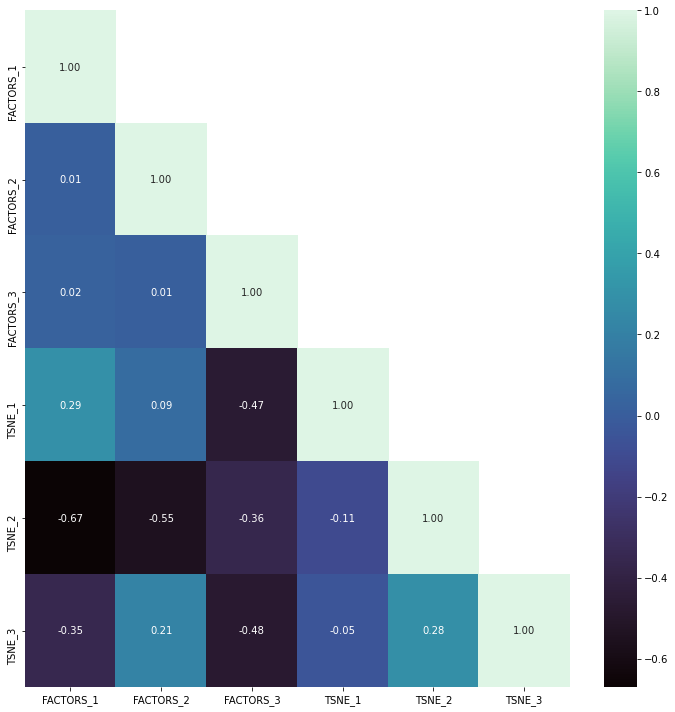

In [16]:
corr_embeddings = merged[["FACTORS_1", "FACTORS_2", "FACTORS_3", "TSNE_1", "TSNE_2", "TSNE_3"]].corr()
lower_corr = corr_embeddings.where(np.tril(np.ones(corr_embeddings.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
corr_hmap=sb.heatmap(lower_corr, annot=True, cmap="mako", fmt=".2f")
fig = corr_hmap.get_figure()
fig.tight_layout()
fig.savefig("embeddings_heatmap.png")

## Factor Analysis vs. tSNE

Looks like these two things may be getting at different aspects of the data, for the most part.


In [17]:
merged.shape

(2694, 76)

## KMeans Clustering on tSNE

In [18]:
from sklearn.cluster import KMeans

k = 5

clustered_df = pd.DataFrame()
kmeans = KMeans(n_clusters=k)
KM_TSNE = kmeans.fit_predict(TSNE)
clustered_df["KM_TSNE"] = KM_TSNE
clustered_df


,KM_TSNE
0,4
1,2
2,1
3,2
4,2
...,...
2689,3
2690,0
2691,1
2692,3


In [19]:
merged = merged.iloc[:,0:76]
merged = merged.merge(clustered_df,  left_index=True, right_index=True)
merged.head()

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,CNTY_BENE_CT,CNTY_BENE_USRS,CNTY_MEAN_AGE,CNTY_SEX_PROP,TOT_CNCR_CASES,TOT_STRKETIA_CASES,TOT_ESRD_CASES,CNTY_TOT_VSTS,...,Illness FACTOR,Hospitalization FACTOR,FACTORS_1,FACTORS_2,FACTORS_3,KM_FACTORS,TSNE_1,TSNE_2,TSNE_3,KM_TSNE
0,1,1,16,13,65.4,0.187500,3,3,5,112,...,0.785873,-0.122812,-0.295489,0.822719,0.093919,3,9.242106,-5.110165,-11.567027,4
1,1,3,95,65,70.3,0.463158,18,8,18,720,...,-0.431479,0.216796,0.929719,-0.441932,0.235808,4,5.333952,-12.482608,-12.750140,2
2,1,5,14,12,72.4,0.642857,0,0,4,92,...,-0.469385,0.223178,-0.186919,-0.534365,0.630980,0,-11.138145,4.038353,-0.760248,1
3,1,7,17,12,69.0,0.411765,2,3,4,152,...,0.253332,-0.200188,0.707499,0.360124,-0.366061,3,1.813346,-10.088836,3.131184,2
4,1,11,5,2,71.5,0.200000,0,1,2,41,...,-1.412240,-0.246765,3.388853,-1.407649,-0.853064,4,1.725450,-16.089573,-15.685245,2


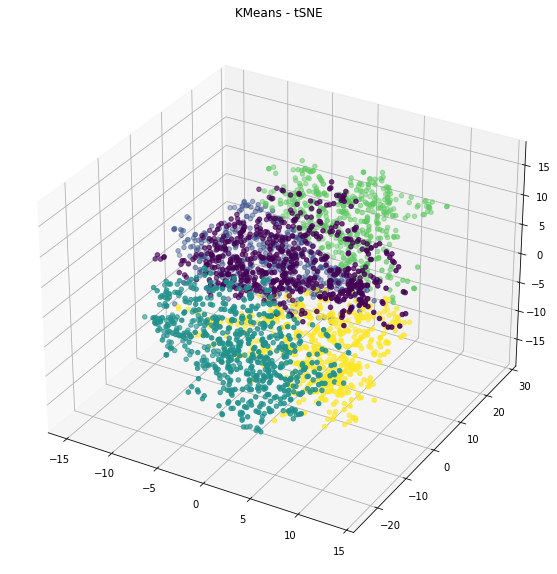

In [20]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
z = merged["TSNE_3"]
x = merged["TSNE_1"]
y = merged["TSNE_2"]
c = merged["KM_TSNE"]
ax.scatter(x, y, z, c=c)
ax.set_title('KMeans - tSNE')
plt.show()

In [21]:
merged["FIPS"] = FIPS
merged["STATE"] = STATE
merged["COUNTY"] = COUNTY
merged['FIPS_STATE_CODE'] = FIPS_STATE
merged['FIPS_COUNTY_CODE'] = FIPS_COUNTY
merged['CBSA'] = CBSA

merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FIPS_STATE_CODE         2694 non-null   int64  
 1   FIPS_COUNTY_CODE        2694 non-null   int64  
 2   CNTY_BENE_CT            2694 non-null   int64  
 3   CNTY_BENE_USRS          2694 non-null   int64  
 4   CNTY_MEAN_AGE           2694 non-null   float64
 5   CNTY_SEX_PROP           2694 non-null   float64
 6   TOT_CNCR_CASES          2694 non-null   int64  
 7   TOT_STRKETIA_CASES      2694 non-null   int64  
 8   TOT_ESRD_CASES          2694 non-null   int64  
 9   CNTY_TOT_VSTS           2694 non-null   int64  
 10  CNTY_TOT_IP_VSTS        2694 non-null   int64  
 11  CNTY_TOT_OP_VSTS        2694 non-null   int64  
 12  CNTY_TOT_CODES          2694 non-null   float64
 13  CNTY_TOT_PROCS          2694 non-null   float64
 14  CNTY_MEAN_IP_STAY       2694 non-null   

In [22]:
merged.to_csv("/home/kylier/python/DS/data/PUF/PUF_RWJF_MERGED_CLUSTERED_NOOUTLIERS2.csv")